In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

plt.style.use("customstyle.mplstyle")

DATA_FOLDER = Path("../data")

# K-Nearest Neighbors Regression

We use a K-Nearest Neighbors Regression.

In [2]:
collisions = pd.read_pickle(DATA_FOLDER / "final_dataset_train.pkl")
collisions_df = collisions.drop(columns=["physicalid", "geometry"])

In [44]:
features = [
    "st_width",
    "has_humps",
    "has_parking_meters",
    "has_bike_lane",
    "is_av",
    "is_st",
    "is_rd",
    "n_trees",
]

In [45]:
kfold = KFold(shuffle=True, random_state=2531)
mses = np.zeros((5, 50))

for i, (tt_idx, ho_idx) in enumerate(kfold.split(collisions_df)):
    coll_tt = collisions_df.iloc[tt_idx]
    coll_ho = collisions_df.iloc[ho_idx]

    for j in range(1, 51):
        knnpipe = Pipeline(
            [("scaler", StandardScaler()), ("knn", KNeighborsRegressor(j))]
        )

        knnpipe.fit(coll_tt[features], coll_tt["collision_rate"])
        pred = knnpipe.predict(coll_ho[features])
        mses[i, j - 1] = mean_squared_error(coll_ho["collision_rate"], pred)

In [50]:
np.argmin(mses.mean(axis=0))

48

Note due to the indexing this is k = 49. Also questionable if we should go this high since it starts to level off way sooner.

In [51]:
mses.mean(axis=0)[48]

0.013864492265836026

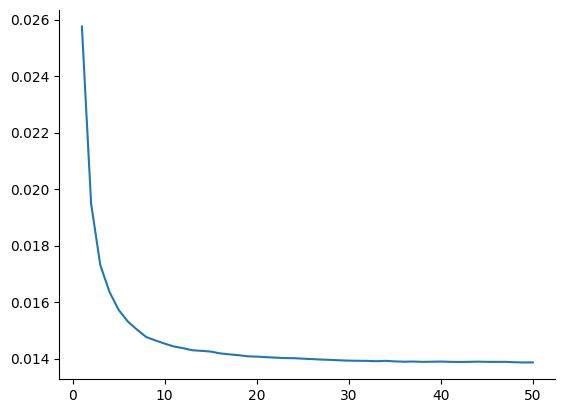

In [47]:
plt.figure()
plt.plot(range(1, 51), mses.mean(axis=0))
plt.show()